### Simple Moving Average (SMA)

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')    # import the necessary libraries

In [13]:
df = pd.read_csv('PG_Data.csv', usecols=['Date', 'Close'], parse_dates=True)

In [14]:
# df = pd.read_csv('PG_Data.csv', index_col=['Date'], usecols=['Date', 'Close'], parse_dates=True) # import the dataset

In [15]:
df.head()  # checking the first five rows of data

,Date,Close
0,1962-01-02,1.429688
1,1962-01-03,1.414063
2,1962-01-04,1.390625
3,1962-01-05,1.380859
4,1962-01-08,1.343750


In [16]:
df.dtypes

Date      object
Close    float64
dtype: object

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df = df[df['Date'] > '2020-12-31']

In [19]:
df.info()  # checking the details of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 14853 to 15403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    551 non-null    datetime64[ns]
 1   Close   551 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


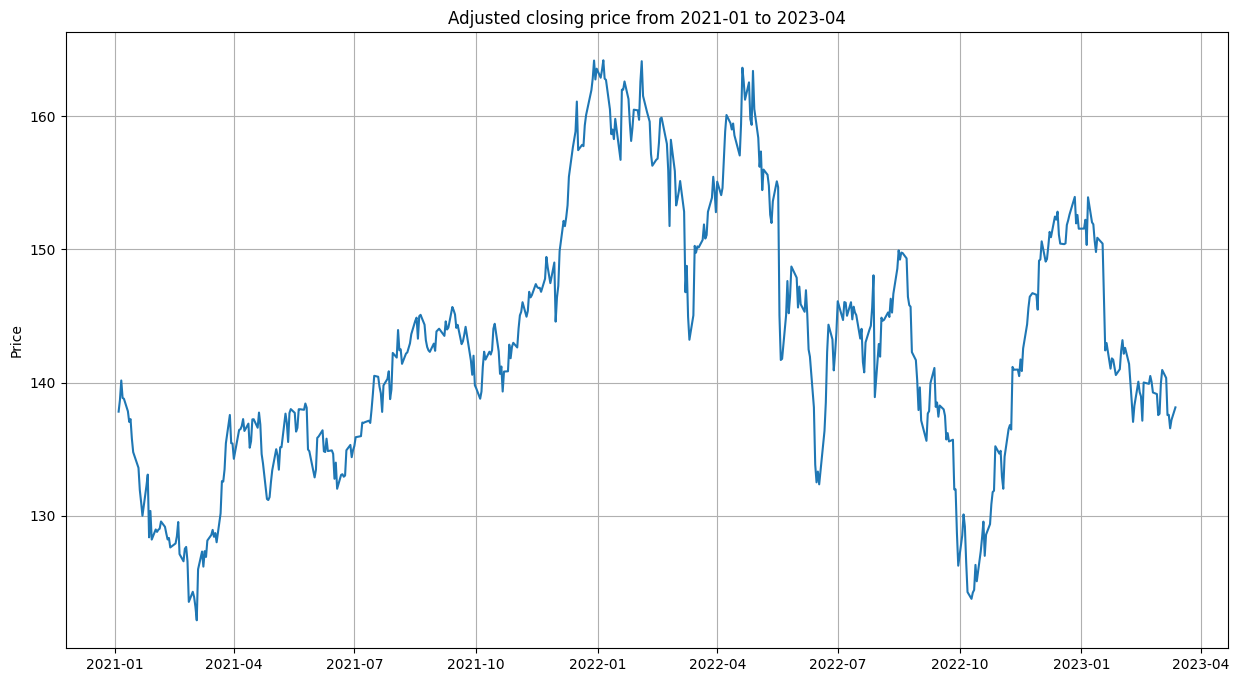

In [20]:
plt.figure(figsize= (15, 8))
plt.title('Adjusted closing price from 2021-01 to 2023-04')
plt.plot(df['Date'], df['Close'])
# plt.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()   # plot the graph based on data
   

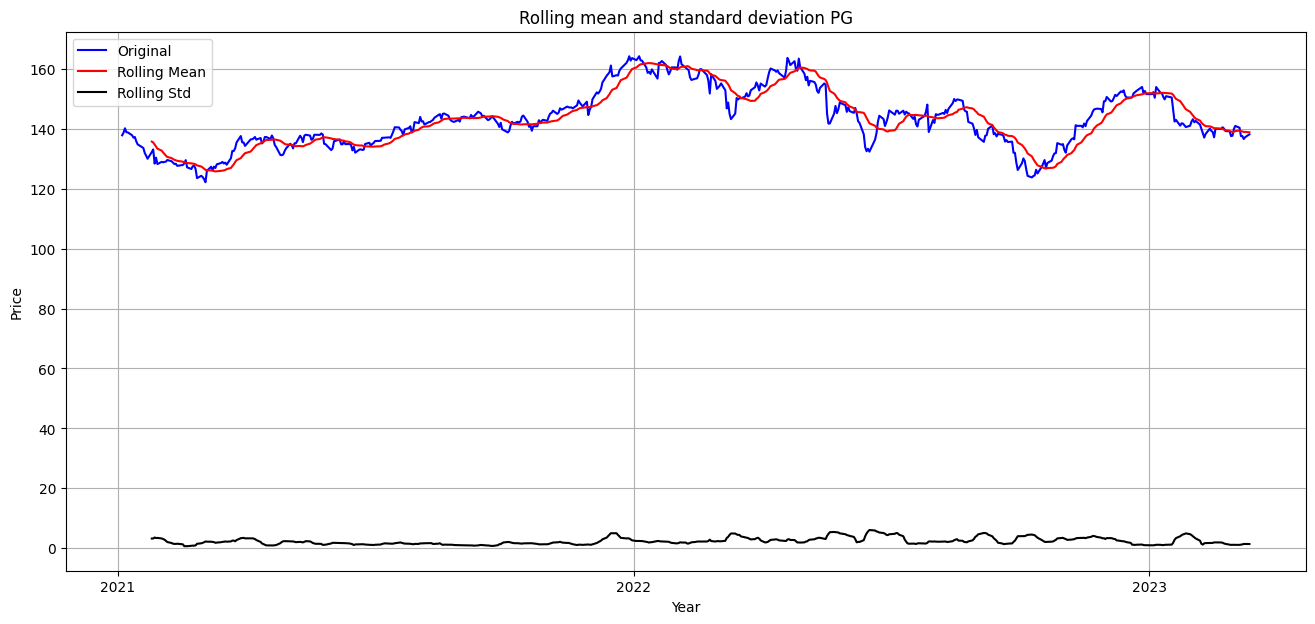

In [21]:
# calculate rolling mean and standard deviation
rolling_mean = df['Close'].rolling(15).mean()
rolling_std = df['Close'].rolling(15).std()

# create a figure with a specific size
plt.figure(figsize = (16, 7))

# plot the original data, rolling mean, and rolling std
orig = plt.plot(df['Date'], df['Close'], color='blue', label='Original')
mean = plt.plot(df['Date'], rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(df['Date'], rolling_std, color='black', label='Rolling Std')

# set the x-axis to show only years
date_form = DateFormatter("%Y")
year_locator = YearLocator(base=1, month=1, day=1)
plt.gca().xaxis.set_major_locator(year_locator)
plt.gca().xaxis.set_major_formatter(date_form)

# set the title and axis labels
plt.title('Rolling mean and standard deviation ' + 'PG')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid()

# show the plot
plt.show()


In [22]:
# create 20 days simple moving average column
df['SMA20'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['SMA50'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df.head()

,Date,Close,SMA20,SMA50
14853,2021-01-04,137.820007,137.820007,137.820007
14854,2021-01-05,138.699997,138.260002,138.260002
14855,2021-01-06,140.160004,138.893336,138.893336
14856,2021-01-07,138.850006,138.882504,138.882504
14857,2021-01-08,138.789993,138.864001,138.864001


In [23]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)

In [24]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()


,Date,Close,SMA20,SMA50,Signal,Position
14853,2021-01-04,137.820007,137.820007,137.820007,0.0,NaN
14854,2021-01-05,138.699997,138.260002,138.260002,0.0,0.0
14855,2021-01-06,140.160004,138.893336,138.893336,0.0,0.0
14856,2021-01-07,138.850006,138.882504,138.882504,0.0,0.0
14857,2021-01-08,138.789993,138.864001,138.864001,0.0,0.0


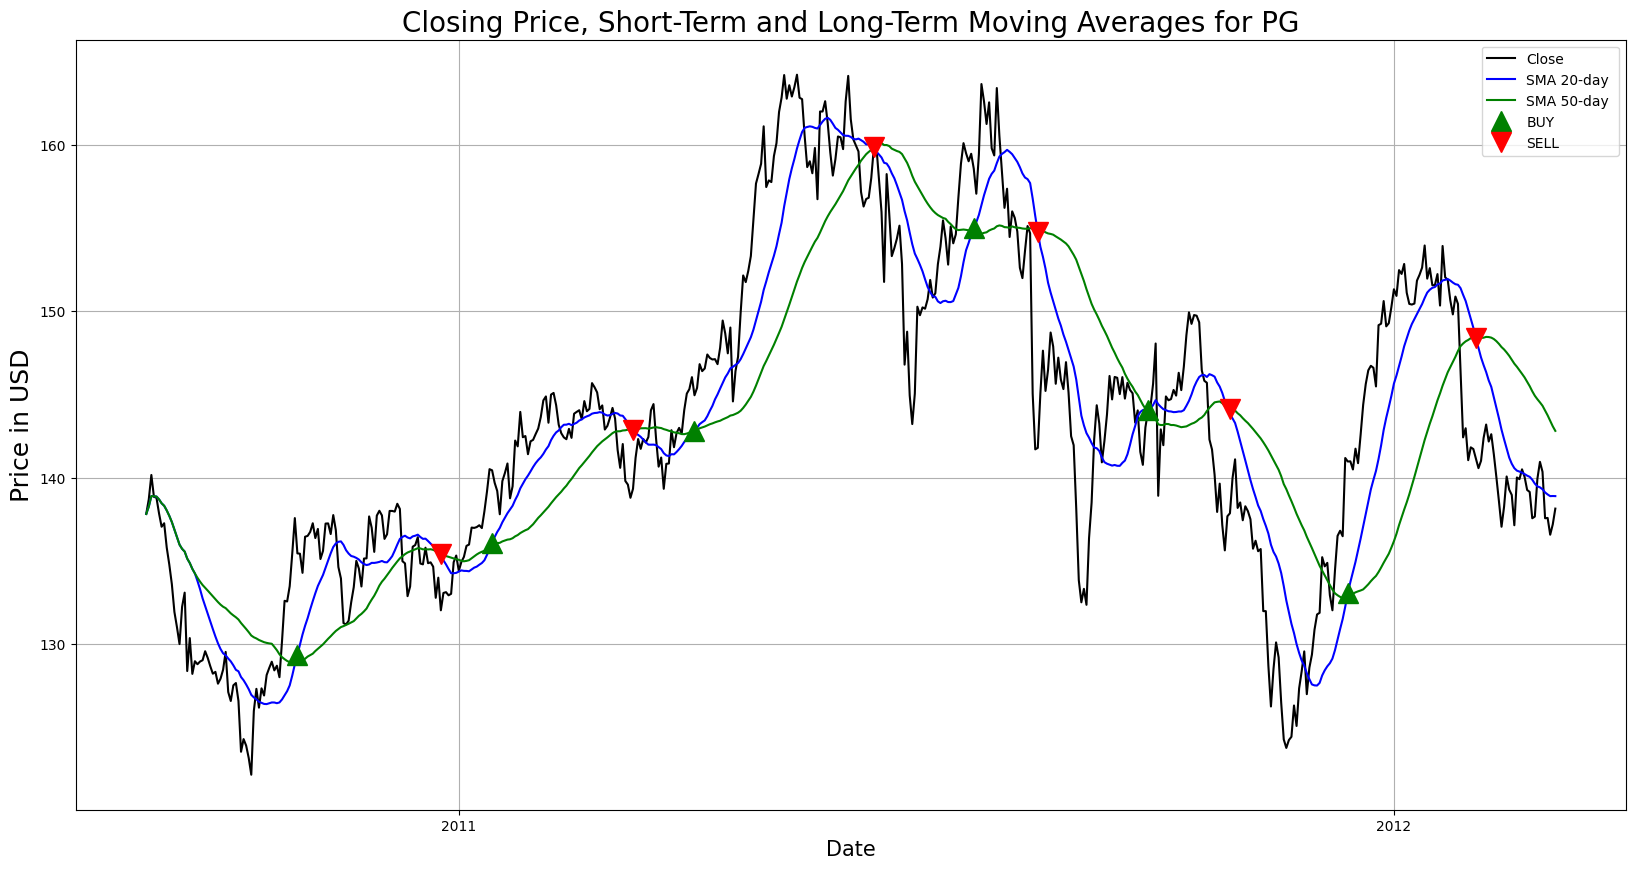

In [28]:
plt.figure(figsize = (20,10))

# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close') 
df['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df['SMA50'].plot(color = 'g', label = 'SMA 50-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')

date_form = DateFormatter("%Y")
year_locator = YearLocator(base=1)
plt.gca().xaxis.set_major_locator(year_locator)
plt.gca().xaxis.set_major_formatter(date_form)

plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Closing Price, Short-Term and Long-Term Moving Averages for PG', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


In [26]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+-------+---------------------+---------+---------+---------+----------+------------+
|       | Date                |   Close |   SMA20 |   SMA50 |   Signal | Position   |
|-------+---------------------+---------+---------+---------+----------+------------|
| 14912 | 2021-03-30 00:00:00 |  135.45 | 129.354 | 128.926 |        1 | Buy        |
| 14968 | 2021-06-18 00:00:00 |  132.03 | 135.277 | 135.429 |        0 | Sell       |
| 14988 | 2021-07-19 00:00:00 |  140.44 | 136.102 | 135.946 |        1 | Buy        |
| 15043 | 2021-10-05 00:00:00 |  139.33 | 142.826 | 142.843 |        0 | Sell       |
| 15067 | 2021-11-08 00:00:00 |  144.95 | 142.833 | 142.828 |        1 | Buy        |
| 15137 | 2022-02-17 00:00:00 |  159.82 | 159.722 | 159.851 |        0 | Sell       |
| 15176 | 2022-04-14 00:00:00 |  158.57 | 155.006 | 154.773 |        1 | Buy        |
| 15201 | 2022-05-20 00:00:00 |  141.79 | 154.751 | 154.753 |        0 | Sell       |
| 15244 | 2022-07-25 00:00:00 |  143.99 | 144.078 | 14